In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

In [2]:
df=pd.read_csv("C:/Users/User-pc/Downloads/Speed Dating Data.csv/Speed Dating Data.csv", encoding = "ISO-8859-1")

In [3]:
for i in df.columns : print(i) 

iid
id
gender
idg
condtn
wave
round
position
positin1
order
partner
pid
match
int_corr
samerace
age_o
race_o
pf_o_att
pf_o_sin
pf_o_int
pf_o_fun
pf_o_amb
pf_o_sha
dec_o
attr_o
sinc_o
intel_o
fun_o
amb_o
shar_o
like_o
prob_o
met_o
age
field
field_cd
undergra
mn_sat
tuition
race
imprace
imprelig
from
zipcode
income
goal
date
go_out
career
career_c
sports
tvsports
exercise
dining
museums
art
hiking
gaming
clubbing
reading
tv
theater
movies
concerts
music
shopping
yoga
exphappy
expnum
attr1_1
sinc1_1
intel1_1
fun1_1
amb1_1
shar1_1
attr4_1
sinc4_1
intel4_1
fun4_1
amb4_1
shar4_1
attr2_1
sinc2_1
intel2_1
fun2_1
amb2_1
shar2_1
attr3_1
sinc3_1
fun3_1
intel3_1
amb3_1
attr5_1
sinc5_1
intel5_1
fun5_1
amb5_1
dec
attr
sinc
intel
fun
amb
shar
like
prob
met
match_es
attr1_s
sinc1_s
intel1_s
fun1_s
amb1_s
shar1_s
attr3_s
sinc3_s
intel3_s
fun3_s
amb3_s
satis_2
length
numdat_2
attr7_2
sinc7_2
intel7_2
fun7_2
amb7_2
shar7_2
attr1_2
sinc1_2
intel1_2
fun1_2
amb1_2
shar1_2
attr4_2
sinc4_2
intel4_2
fun4_2
amb

On fait le tri des variables en fonction du pourcentage de réponses manquantes
certaines ayant moins de 25% de valeur non-Nan

In [117]:
def liste_NA(table, seuil):
    nb_obs = df.shape[0]
    m_seuil = []
    for i in table.columns:
        #print(i + '{0}'.format(df[i].count()/nb_obs))
        if table[i].count()/nb_obs < seuil : 
            m_seuil.append(i)
    return(m_seuil)


def pcNA(var):
    return(df[var].count()/nb_obs)

In [93]:
import category_encoders as ce
dd = ce.one_hot.OneHotEncoder(df[['race_o']])
dd

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
#enc.fit(df[['race_o']])

    race_o  race  match
2      4.0   4.0      1
3      2.0   4.0      1
4      3.0   4.0      1
8      2.0   4.0      1
13     2.0   2.0      1


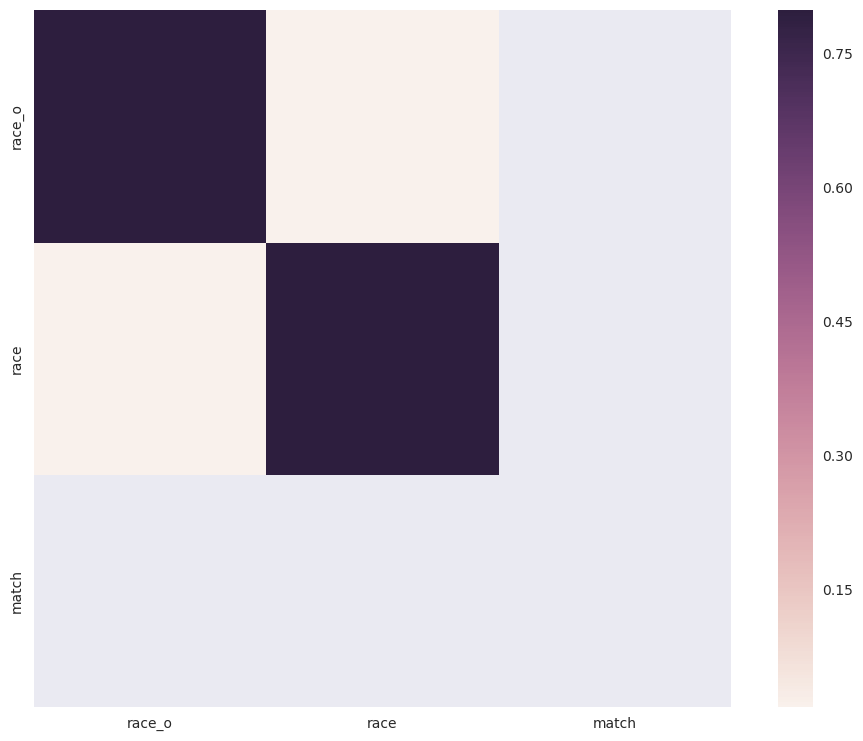

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datset of correlations between cortical brain networks
#corrmat = df[[df.columns[i] for i in range(40)]].corr()
df2 = df[["race_o",'race','match']]
df2=df2[df2["match"]==1]
corrmat = df2.corr()
print(df2.head())

f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)


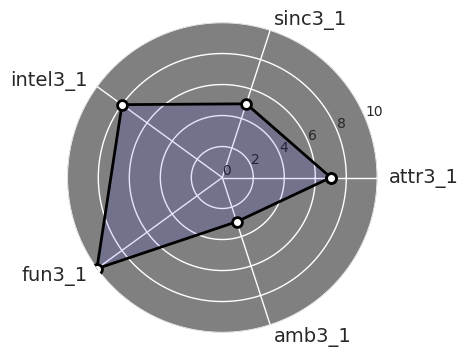

In [394]:
import numpy as np
import matplotlib
import matplotlib.path as path
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Data to be represented
# ----------
properties = ['attr3_1', 'sinc3_1', 'intel3_1', 
              'fun3_1', 'amb3_1']

values = df[['attr3_1', 'sinc3_1', 'intel3_1','fun3_1', 'amb3_1']].loc[10]
values1 = df[['attr3_2', 'sinc3_2', 'intel3_2','fun3_2', 'amb3_2']].loc[10]

# ----------
def graphe_en_radar(properties,values):


    # Choose some nice colors
    matplotlib.rc('axes', facecolor = 'grey')

    # Make figure background the same colors as axes 
    fig = plt.figure(figsize=(5,4), facecolor='white')

    # Use a polar axes
    axes = plt.subplot(111, polar=True)

    # Set ticks to the number of properties (in radians)
    t = np.arange(0,2*np.pi,2*np.pi/len(properties))
    plt.xticks(t, [])

    # Set yticks from 0 to 10
    plt.yticks(np.linspace(0,10,6))

    # Draw polygon representing values
    points = [(x,y) for x,y in zip(t,values)]
    points.append(points[0])
    points = np.array(points)
    codes = [path.Path.MOVETO,] + \
            [path.Path.LINETO,]*(len(values) -1) + \
            [ path.Path.CLOSEPOLY ]
    _path = path.Path(points, codes)
    _patch = patches.PathPatch(_path, fill=True, color='blue', linewidth=0, alpha=.1)
    axes.add_patch(_patch)
    _patch = patches.PathPatch(_path, fill=False, linewidth = 2)
    axes.add_patch(_patch)

    # Draw circles at value points
    plt.scatter(points[:,0],points[:,1], linewidth=2,
                s=50, color='white', edgecolor='black', zorder=10)

    # Set axes limits
    plt.ylim(0,10)

    # Draw ytick labels to make sure they fit properly
    for i in range(len(properties)):
        angle_rad = i/float(len(properties))*2*np.pi
        angle_deg = i/float(len(properties))*360
        ha = "right"
        if angle_rad < np.pi/2 or angle_rad > 3*np.pi/2: ha = "left"
        plt.text(angle_rad, 10.75, properties[i], size=14,
                 horizontalalignment=ha, verticalalignment="center")

        # A variant on label orientation
        #    plt.text(angle_rad, 11, properties[i], size=14,
        #             rotation=angle_deg-90,
        #             horizontalalignment='center', verticalalignment="center")

    # Done

graphe_en_radar(properties, values)
plt.show()

In [28]:
values = df[['attr1_1', 'sinc1_1', 'intel1_1','fun1_1', 'amb1_1', 'shar1_1']].loc[0]

attr1_1     15.0
sinc1_1     20.0
intel1_1    20.0
fun1_1      15.0
amb1_1      15.0
shar1_1     15.0
Name: 0, dtype: float64

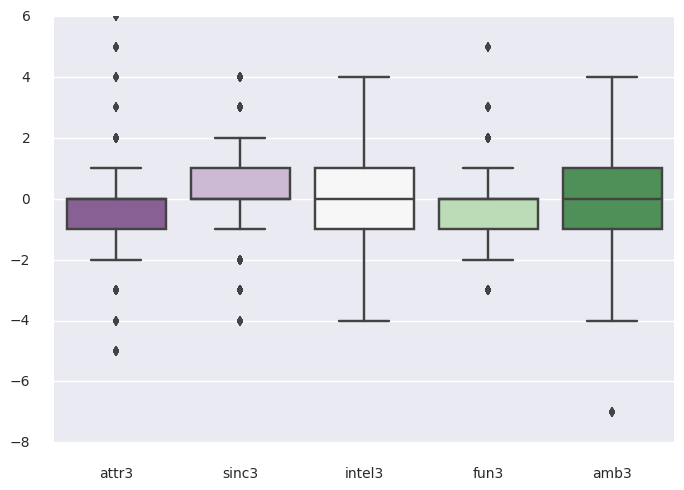

In [92]:
avant = df[['attr1_1', 'sinc1_1', 'intel1_1','fun1_1', 'amb1_1', 'shar1_1']].loc[0]
après = df[['attr1_2', 'sinc1_2', 'intel1_2','fun1_2', 'amb1_2', 'shar1_2']].loc[0]
bien_après = df[['attr1_3', 'sinc1_3', 'intel1_3','fun1_3', 'amb1_3', 'shar1_3']].loc[0]

def evolution(var):
    colonne = df['{0}_1'.format(var)]-df['{0}_3'.format(var)]
    return colonne

for i in ['attr1', 'sinc1', 'intel1','fun1', 'amb1', 'shar1']:
    df[i]=evolution(i)
    
sns.boxplot(data=df[['attr1', 'sinc1', 'intel1','fun1', 'amb1', 'shar1']], palette="PRGn")
sns.despine(offset=10, trim=True)

## Matrix Factorization

In [102]:
import numpy
 
def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    Q = Q.T
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = numpy.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
        if e < 0.001:
            break
    return P, Q.T

In [105]:
R = [
     [5,3,0,1],
     [4,0,0,1],
     [1,1,0,5],
     [1,0,0,4],
     [0,1,5,4],
    ]
R = numpy.array(R)
N = len(R)
M = len(R[0])
K = 2
P = numpy.random.rand(N,K)
Q = numpy.random.rand(M,K)
nP, nQ = matrix_factorization(R, P, Q, K)
nR = numpy.dot(nP, nQ.T)
nR

array([[ 4.98077764,  2.97725102,  2.46487833,  0.99868486],
       [ 3.97732269,  2.39221454,  2.19833779,  0.99882557],
       [ 1.01893025,  0.95792601,  5.93533538,  4.95768068],
       [ 0.99115896,  0.8694041 ,  4.80191525,  3.97215308],
       [ 1.29043265,  1.04831482,  4.95033678,  4.03243768]])

In [285]:
#table des personnes : on en a 552
#'undergra','mn_sat','income' < 60% de non NA
#liste_NA(table_id,0.6)
#'goal','career','career_c',

table_id=df[['iid','id','gender','age','field','field_cd','race','imprace','imprelig','from','date','go_out',
   'sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading','tv','theater','movies','concerts','music','shopping','yoga',
   'attr1_1', 'sinc1_1', 'intel1_1','fun1_1', 'amb1_1', 'shar1_1','attr3_1', 'sinc3_1', 'intel3_1','fun3_1', 'amb3_1']]

table_id=table_id.drop_duplicates()
table_id=table_id.dropna()
#table_id.shape
table_id


,iid,id,gender,age,field,field_cd,race,imprace,imprelig,from,...,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr3_1,sinc3_1,intel3_1,fun3_1,amb3_1
0,1,1.0,0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,...,20.00,20.00,15.00,15.00,15.00,6.0,8.0,8.0,8.0,7.0
10,2,2.0,0,24.0,law,1.0,2.0,2.0,5.0,Alabama,...,5.00,25.00,20.00,0.00,5.00,7.0,5.0,8.0,10.0,3.0
20,3,3.0,0,25.0,Economics,2.0,2.0,8.0,4.0,Connecticut,...,10.00,35.00,10.00,10.00,0.00,8.0,9.0,9.0,8.0,8.0
30,4,4.0,0,23.0,Law,1.0,2.0,1.0,1.0,Texas,...,20.00,20.00,20.00,10.00,10.00,7.0,8.0,7.0,9.0,8.0
40,5,5.0,0,21.0,Law,1.0,2.0,8.0,1.0,Bowdoin College,...,5.00,25.00,25.00,10.00,15.00,6.0,3.0,10.0,6.0,8.0
50,6,6.0,0,23.0,law,1.0,4.0,1.0,1.0,MD,...,25.00,20.00,25.00,5.00,15.00,5.0,7.0,9.0,8.0,5.0
60,7,7.0,0,22.0,Law,1.0,4.0,2.0,4.0,Southern California,...,15.00,25.00,20.00,15.00,10.00,6.0,6.0,7.0,5.0,7.0
70,8,8.0,0,25.0,Masters in Public Administration,13.0,2.0,1.0,1.0,"London, England",...,18.18,27.27,18.18,18.18,9.09,7.0,4.0,8.0,8.0,8.0
80,9,9.0,0,26.0,Masters in Public Administration,13.0,6.0,1.0,1.0,"Palm Springs, California",...,10.00,20.00,30.00,10.00,10.00,7.0,6.0,7.0,10.0,7.0
90,10,10.0,0,26.0,Masters of Social Work&Education,13.0,2.0,4.0,4.0,94115,...,15.00,15.00,40.00,10.00,5.00,6.0,8.0,6.0,10.0,9.0


In [286]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
table_dummies = pd.get_dummies(table_id['field'])
result = pd.concat([table_id, table_dummies], axis=1)
result.drop('field', axis=1, inplace=True)
result.drop('field_cd', axis=1, inplace=True)
result.drop('from', axis=1, inplace=True)
result.head()

,iid,id,gender,age,race,imprace,imprelig,date,go_out,sports,...,physics (astrophysics),political science,psychology,psychology and english,social work,sociology,speech pathology,teaching of English,theory,working
0,1,1.0,0,21.0,4.0,2.0,4.0,7.0,1.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,2,2.0,0,24.0,2.0,2.0,5.0,5.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,3,3.0,0,25.0,2.0,8.0,4.0,3.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,4,4.0,0,23.0,2.0,1.0,1.0,5.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,5,5.0,0,21.0,2.0,8.0,1.0,4.0,1.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# PCA

[[ -9.99954532e-01  -2.45472952e-03  -2.16078684e-04  -3.34550251e-03
   -4.80698627e-04   1.17756077e-03   1.01700888e-03  -4.92265300e-05
   -4.34204672e-04  -2.72246146e-04   4.97800982e-04   2.98600298e-04
   -9.27982151e-04  -9.14565151e-04  -1.55170956e-03  -6.35397755e-04
    3.25915623e-04   1.13514022e-03   1.89410020e-04   4.54091965e-04
   -3.93107086e-05   4.74914160e-04  -6.12722894e-04  -4.92226576e-04
   -3.97617261e-04  -3.16616979e-04  -5.99953162e-03  -7.08573278e-04
    2.19455918e-03   2.38140002e-04   4.53227244e-03   5.98234151e-04
   -1.05323230e-04  -7.13182695e-04   7.09177246e-05  -3.02777762e-07
   -4.74095324e-04  -1.77202342e-05  -1.53510411e-05   2.98414856e-06
    8.30318391e-06  -3.30261769e-06  -1.67771550e-06   1.79833822e-05
   -5.37024687e-06  -4.33655744e-06   9.95487860e-06   6.14355802e-07
    1.12593362e-05   2.90774605e-06  -7.16620969e-06  -1.19500357e-05
    6.01087228e-06  -1.76646017e-05  -2.98101137e-05  -1.62315913e-05
   -3.22847401e-05  

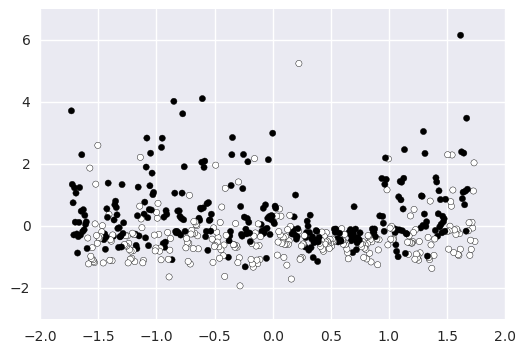

In [184]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)
table_pca = result
table_pca.drop('iid', axis=1, inplace=True)
table_pca.drop('id', axis=1, inplace=True)


pca.fit(table_pca)

print(pca.components_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())
X_pca = pca.transform(table_pca)
X_pca = pca.transform(table_pca)

y=result['gender']
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1],c=y)


## Kmeans

In [246]:
from sklearn.cluster import KMeans
from sklearn import neighbors
table_femme = result[result['gender']==1]
table_homme = result[result['gender']==0]
table_femme = table_femme.drop('gender', axis=1)
table_homme = table_homme.drop('gender', axis=1)

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
y=table_femme[['iid']]
y=np.array(y).T[0]
knn.fit(table_femme,y)
knn.predict(table_homme.ix[0])
#kmeans = KMeans(n_clusters=5, random_state=0).fit(result)
#kmeans.labels_
#kmeans = KMeans(n_clusters=5, random_state=0).fit(result)

C:\Users\User-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([13], dtype=int64)

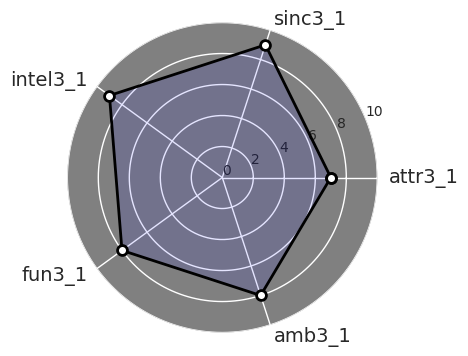

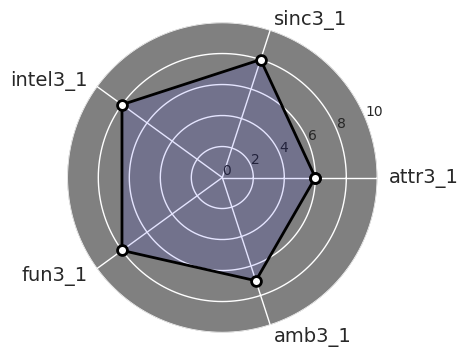

In [395]:
aa = pd.DataFrame(table_id[table_id['iid']==137]).drop_duplicates().T
aa[0] = pd.DataFrame(table_id[table_id['iid']==1]).drop_duplicates().T
aa[130] = pd.DataFrame(table_id[table_id['iid']==130]).drop_duplicates().T
aa

properties = ['attr3_1', 'sinc3_1', 'intel3_1', 
              'fun3_1', 'amb3_1']

values = df[['attr3_1', 'sinc3_1', 'intel3_1','fun3_1', 'amb3_1']].loc[1871]
values1 = df[['attr3_1', 'sinc3_1', 'intel3_1','fun3_1', 'amb3_1']].loc[0]
graphe_en_radar(properties, values)
graphe_en_radar(properties, values1)

## Distance 

In [348]:
from scipy.spatial.distance import *
from sklearn.neighbors import KNeighborsClassifier
table_id=df[['iid','id','gender','age','field','field_cd','race','imprace','imprelig','from','date','go_out',
   'sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading','tv','theater','movies','concerts','music','shopping','yoga',
   'attr1_1', 'sinc1_1', 'intel1_1','fun1_1', 'amb1_1', 'shar1_1','attr3_1', 'sinc3_1', 'intel3_1','fun3_1', 'amb3_1']]
table_dummies = pd.get_dummies(table_id['field'])
result = pd.concat([table_id, table_dummies], axis=1)
result.drop('field', axis=1, inplace=True)
result.drop('field_cd', axis=1, inplace=True)
result.drop('from', axis=1, inplace=True)
result.head()


table_feature = table_femme[['race','attr3_1', 'sinc3_1', 'intel3_1','fun3_1', 'amb3_1',
   'sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading','tv','theater','movies','concerts','music','shopping','yoga',
   'age','go_out']]

table_feature_homme = table_homme[['race','attr3_1', 'sinc3_1', 'intel3_1','fun3_1', 'amb3_1',
   'sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading','tv','theater','movies','concerts','music','shopping','yoga',
   'age','go_out']]
table_poids = table_homme[['imprace','attr1_1', 'sinc1_1', 'intel1_1','fun1_1', 'amb1_1', 'shar1_1']]/100
table_poids['imprace']=table_poids['imprace']*10
Y = pdist(aa.T, 'euclidean')

for i in range(16):
    table_poids['var{0}'.format(i)]=table_poids['shar1_1']
for i in range(16,18):
    table_poids['var{0}'.format(i)]=1

print(table_feature.shape)
table_poids.shape

def f(table):
    a = table.shape[0]
    x = np.array([np.array(table_poids.ix[0])]*a)
    return x

y=table_femme[['iid']]
y=np.array(y).T[0]

neigh = KNeighborsClassifier(n_neighbors=1,weights=f)
neigh.fit(table_feature,y ) 
pred = table_feature_homme.ix[0]
pred =np.array(pred)
neigh.predict(pred)
pred

(270, 25)


C:\Users\User-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\User-pc\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:481: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 25 but corresponding boolean dimension is 1
  template[ind] = w[ind]


array([  4.,   6.,   8.,   8.,   8.,   7.,   9.,   2.,   8.,   9.,   1.,
         1.,   5.,   1.,   5.,   6.,   9.,   1.,  10.,  10.,   9.,   8.,
         1.,  21.,   1.])

# Peut ont predire le succès d'un rdv en fonction de l'importance qu'un individu apporte a differentes qualités (Intelligence, Attirance, sincerité, Humour Ambition, Interet commun)?

Une première idée serait d'essayer de voir si on peut predire la décision finale d'un type (est ce que il/elle veut revoir la personne qu'il a rencontré) en fonction de l'impression qu'a eu le type sur la personne et l'importance qu'il/elle apporte à differents critères.

La décision finale est contenu dans la variable dec (1=yes, 0=no).

L'importance que l'individu apporte aux differents critères sont contenue dans les variables: attr1_1 (Attractive), 
sinc1_1 (Sincere), intel1_1 (Intelligent),fun1_1 (Fun ),amb1_1 (Ambitious), shar1_1 (Shared Interests/Hobbies)  . La question etait la suivante: "You have 100 points to distribute among the following attributes -- give more points to those attributes that are more important in a potential date, and fewer points to those attributes that are less important in a potential date.  Total points must equal 100." (ca c'est pour les vagues de 1 a 5 et de 10 a 21, sinon les gens repondent en donnant une note sur 10)

Les notes attribuées sont contenus dans les variables: attr, sinc, intel, fun, amb, shar.


On fait un nouveau data frame (df2) contenant toutes les variables qui nous interessent, on garde que les individus qui ont repondus a toutes les questions, sur une echelle de 100. list_var contient la liste de toutes les varaibles qui nous interressent.

In [67]:
list_qual=["attr","sinc","intel","fun","amb","shar","dec"]
list_var=[i for i in df.columns if ((any(x in i for x in list_qual)&("1_1" in i))| (i in list_qual))]
df2=df[(df.wave<6)|(df.wave>9)]

In [68]:
df2=pd.concat([df2[[i]] for i in list_var],axis=1).dropna()

La gueule du dataframe:

In [69]:
df2.head()

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,dec,attr,sinc,intel,fun,amb,shar
0,15.0,20.0,20.0,15.0,15.0,15.0,1,6.0,9.0,7.0,7.0,6.0,5.0
1,15.0,20.0,20.0,15.0,15.0,15.0,1,7.0,8.0,7.0,8.0,5.0,6.0
2,15.0,20.0,20.0,15.0,15.0,15.0,1,5.0,8.0,9.0,8.0,5.0,7.0
3,15.0,20.0,20.0,15.0,15.0,15.0,1,7.0,6.0,8.0,7.0,6.0,8.0
4,15.0,20.0,20.0,15.0,15.0,15.0,1,5.0,6.0,7.0,7.0,6.0,6.0


Maintenant il faut verifier que la somme des varialbes vaut bien 100, et supprimer les individus qui savent pas compter. On voit bien ci dessous que yen a , on va dire qu'on tej que 120 148 90 110 et 95

In [50]:
df2["somme"]=df2.attr1_1+ df2.sinc1_1+df2.intel1_1+df2.amb1_1+df2.shar1_1 +df2.fun1_1
df2.somme.unique()
df2=df2[(df2.somme<110)&(df2.somme>95)].drop("somme",1)

# La partie machine learning 1

Dans cette partie on fait juste un arbre de decision sans faire de parameter fitting

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score

On veut predire la variable dec (Y) en fonctions des autres variables contenu dans notre dataframe.

In [52]:
train=df2.sample(frac=0.8,random_state=200)
test=df2.drop(train.index)

In [53]:
Ytrain=train.dec.values
Ytest=test.dec.values
Xtrain=train.drop("dec",1).values
Xtest=test.drop("dec",1).values

In [54]:
clf1=DecisionTreeClassifier()
clf2=RandomForestClassifier()

In [55]:
clf1.fit(Xtrain,Ytrain)
clf2.fit(Xtrain,Ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [56]:
Ypred1=clf1.predict(Xtest)
Ypred2=clf2.predict(Xtest)

Ci dessous la matrice de confusion, qui represente les true positives et true negative en diagonale normale et les false positive et false negative en diagonale inverse.

In [57]:
print(confusion_matrix(Ytest,Ypred1))
print(confusion_matrix(Ytest,Ypred2))

[[484 145]
 [158 320]]
[[551  78]
 [163 315]]


le F1 score qui est pas top (on voit qu'il est meilleur quand on utilise un random forest plutot qu'un seul arbre de decision)

In [58]:
print(f1_score(Ytest,Ypred1),f1_score(Ytest,Ypred2))

0.67868504772 0.723306544202


# La partie parameter fitting

On essaye de voir dans cette partie si en changeant les parametres, on peut obtenir un meilleur score. Faut trouver les meilleurs parametres possible

In [59]:
def split(frac,df):
    train=df.sample(frac=frac,random_state=200)
    test=df.drop(train.index)
    return(train,test)
def XY(train,test):
    Ytrain=train.dec.values
    Ytest=test.dec.values
    Xtrain=train.drop("dec",1).values
    Xtest=test.drop("dec",1).values
    return(Xtrain,Xtest,Ytrain,Ytest)
def n_estimators(n,frac,df):
    clf=RandomForestClassifier(n_estimators=n)
    train,test=split(frac,df)
    clf.fit(XY(train,test)[0], XY(train,test)[2])
    Ypred=clf.predict(XY(train,test)[1])
    return(f1_score(XY(train,test)[3],Ypred ))
    
    
    

In [69]:
l=[]
for i in range (2,100):
    l.append(n_estimators(i,0.8,df2))
    

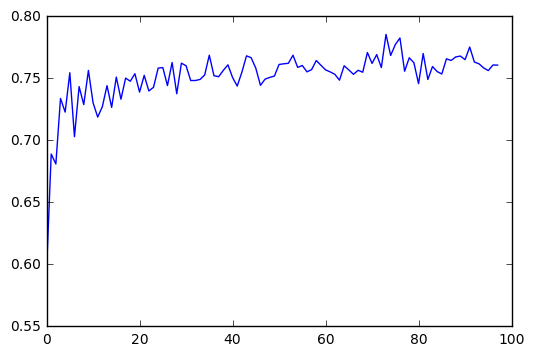

In [70]:
plt.plot(l)